In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#attributes don't use () only methods
df = pd.read_csv("Contact Information (Responses) - Form Responses 1.csv")
df.head()
df.shape

(21, 19)

In [3]:
#used to set display attributes of data frame
pd.set_option('display.max_columns',18)



In [4]:
#head or tail to view rows and can input integer in parenthesis
df.head()


,Timestamp,Sleep,Wake,Sleep Quality,Waking Energy,Work,Focused Learning,Skill practicing,Physical Endeavors,...,jorking,Passive media,Active Media,Dominant Emotion (Less to more pleasurable),Dominant Emotion with intensity (1-10),Enhancers,how much?,MISC,System Architecture
0,6/30/2025 23:48:42,2:00:00 AM,11:00:00 AM,6,9,8 hours,120,60,0,...,1,60,180,0,6,NIC,1 pouch,"Pain in left knee from run on sunday biggest ""...",20
1,7/1/2025,12:00:00 AM,6:00:00 AM,4,10,8 hours transplanting roses in sun,0,10,90,...,2,53,15,4,8,CAF,100 g,Work up goal oriented when I got sleepy took s...,40
2,7/2/2025,12:00:00 AM,6:00:00 AM,6,8,8 hours pulling rose bushes,0,0,100,...,2,90,75,2,8,WE,100,Had a slight discussion with superviser but i ...,30
3,7/3/2025,5:00:00 AM,7:45:00 AM,2,4,0,60,0,0,...,2,90,180,0,10,NaN,NaN,Had to catch a flight lost track of time reaso...,10
4,7/4/2025 0:09:13,3:00:00 AM,11:30:00 AM,3,4,0,30,0,30,...,1,40,260,2,8,NaN,NaN,Had a headache,20


In [6]:
energy = df['Waking Energy']
type(energy)
df.columns
# a dataframe is a container for a group of series which are just arrays

Index(['Timestamp', 'Sleep', 'Wake', 'Sleep Quality', 'Waking Energy', 'Work',
       'Focused Learning', 'Skill practicing', 'Physical Endeavors',
       'Scrolling', 'jorking', 'Passive media ', 'Active Media',
       'Dominant Emotion  (Less to more pleasurable)',
       'Dominant Emotion with intensity (1-10)', 'Enhancers', 'how much?',
       'MISC', 'System Architecture'],
      dtype='object')

In [10]:
#iloc integer location 
df.iloc[0]
#loc index location
df.loc[2]


Timestamp                                                                                7/2/2025
Sleep                                                                                 12:00:00 AM
Wake                                                                                   6:00:00 AM
Sleep Quality                                                                                   6
Waking Energy                                                                                   8
Work                                                                  8 hours pulling rose bushes
Focused Learning                                                                                0
Skill practicing                                                                                0
Physical Endeavors                                                                            100
Scrolling                                                                                      40
jorking             

In [9]:
df["jorking"].value_counts()
df.loc[2:8,'jorking']


2    2
3    2
4    1
5    3
6    1
7    1
8    2
Name: jorking, dtype: object

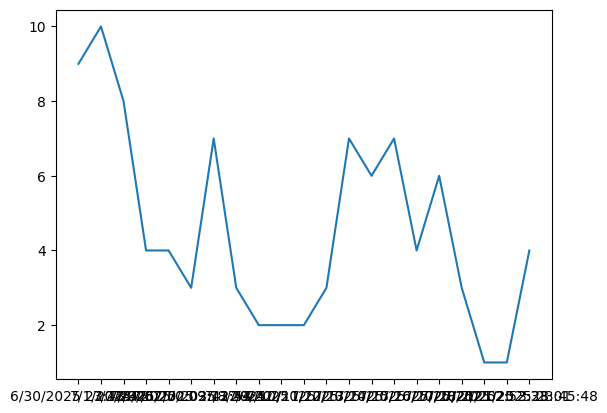

In [5]:
x = df.Timestamp
y = df['Waking Energy']
z = df['Wake']
plt.plot(x,y)

In [ ]:
# explicitly define the format that the data is in to properly turn into date time object

wake_time = pd.to_datetime(df["Wake"],format='%I:%M:%S %p')
sleep_time = pd.to_datetime(df["Sleep"],format='%I:%M:%S %p')



# use mod to deal with over mid night differences so that it wraps around and gives us the actual differnce
df["hours_slept"] = ((wake_time - sleep_time).dt.seconds / 3600) % 24

# .dt to select date time object .hour for 0-23 .seconds for 0-59 etc
df["bedtime_hour"] = sleep_time.dt.hour 
df["wake_hour"] = wake_time.dt.hour
#bedtime_consistency = abs(bedtime_hour - average_bedtime)


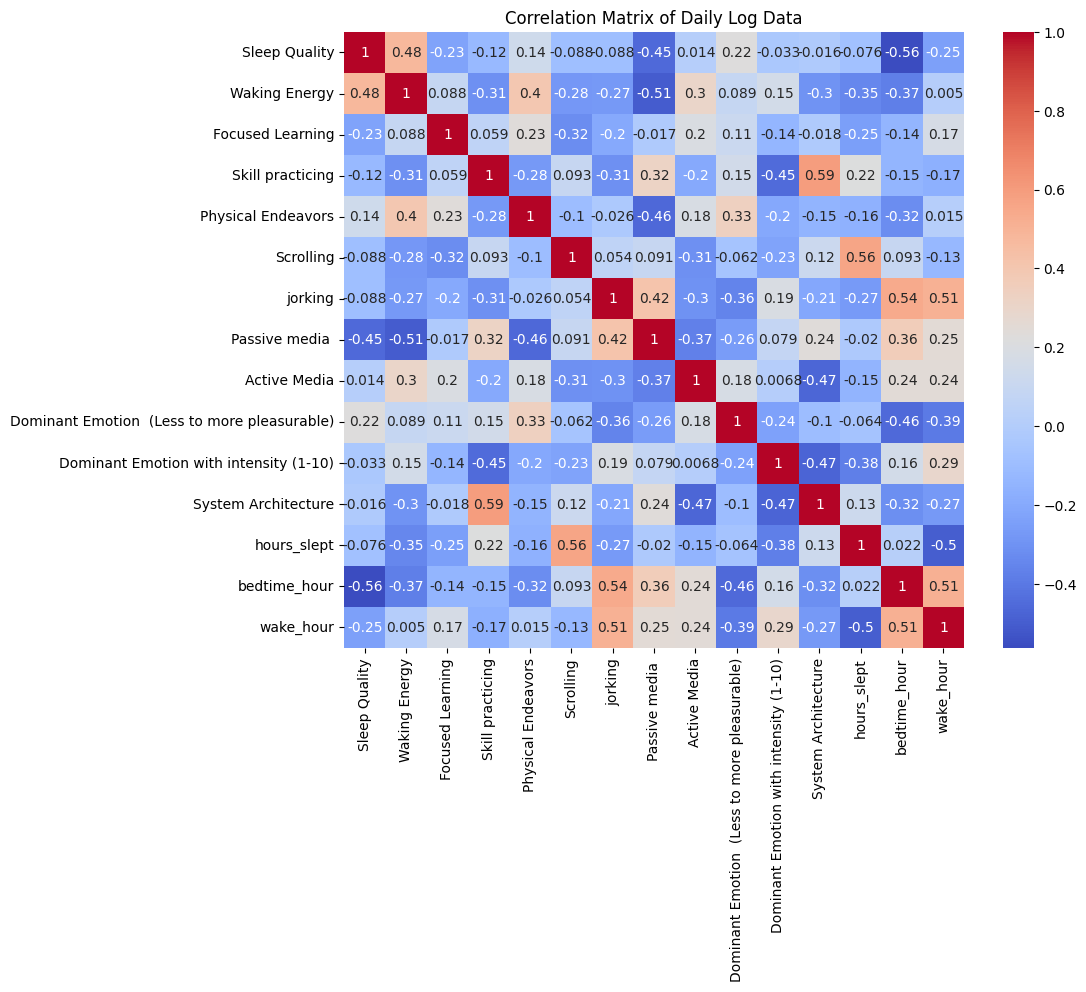

In [27]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8)) # Make the plot bigger
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Daily Log Data')
plt.show()